In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import coolwarm
import numpy as np

In [9]:
# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results/result_summary.csv"
df = pd.read_csv(summary_result_path, sep=",")

# Group the data by 'numTasks' and 'utilization' and calculate the average values
grouped_data = df.groupby(['numTasks', 'utilization'])[['simulator_timeConsumption(us)', 'proposed_timeConsumption(us)']].mean().reset_index()

# Define a function to remove outliers
def remove_outliers(group):
    num_to_remove = 2  # Number of outliers to remove (2 largest and 2 smallest)
    if len(group) <= num_to_remove:
        return group
    sorted_group = group.sort_values(['simulator_timeConsumption(us)', 'proposed_timeConsumption(us)'])
    return sorted_group.iloc[num_to_remove:-num_to_remove]

# Apply the remove_outliers function to each group
grouped_data_filtered = grouped_data.groupby(['numTasks', 'utilization']).apply(remove_outliers)

# Reset the index of the filtered DataFrame
grouped_data_filtered = grouped_data_filtered.reset_index(drop=True)

# Calculate the gap between 'simulator_timeConsumption' and 'proposed_timeConsumption'
grouped_data_filtered['timeConsumptionGap'] = grouped_data_filtered['simulator_timeConsumption(us)'] - grouped_data_filtered['proposed_timeConsumption(us)']

# Create a pivot table to make it easier to plot
pivot_proposed = grouped_data_filtered.pivot(index='numTasks', columns='utilization', values='proposed_timeConsumption(us)')
pivot_simulator = grouped_data_filtered.pivot(index='numTasks', columns='utilization', values='simulator_timeConsumption(us)')
pivot_gap = grouped_data_filtered.pivot(index='numTasks', columns='utilization', values='timeConsumptionGap')


In [10]:
# Create a table that contains the average time consumption of the proposed method and the simulator
table = pd.DataFrame(columns=['numTasks', 'utilization', 'proposed_timeConsumption(us)', 'simulator_timeConsumption(us)', 'timeConsumptionGap'])
table['numTasks'] = grouped_data_filtered['numTasks']
table['utilization'] = grouped_data_filtered['utilization']
table['proposed_timeConsumption(us)'] = grouped_data_filtered['proposed_timeConsumption(us)']
table['simulator_timeConsumption(us)'] = grouped_data_filtered['simulator_timeConsumption(us)']
table['timeConsumptionGap'] = grouped_data_filtered['timeConsumptionGap']
table = table.round(2)

print(table)
table.to_csv('../../exp_results/time_consumption_summary.csv', index=False)

    numTasks  utilization  proposed_timeConsumption(us)   
0          3          0.2                        337.58  \
1          3          0.4                        332.84   
2          3          0.6                        332.02   
3          3          0.8                        351.28   
4          6          0.2                        423.10   
5          6          0.4                        440.30   
6          6          0.6                        431.98   
7          6          0.8                        434.40   
8          9          0.2                        522.98   
9          9          0.4                        518.54   
10         9          0.6                        509.74   
11         9          0.8                        531.00   
12        12          0.2                        721.84   
13        12          0.4                        700.60   
14        12          0.6                        703.92   
15        12          0.8                        710.94 

In [11]:
# a heatmap to show a gap between simulator and proposed
def plot_heatmap(pivot, title, label):
    plt.figure(figsize=(6, 3))
    plt.imshow(pivot, cmap='coolwarm', aspect='auto', interpolation='nearest')
    plt.title(title)
    plt.colorbar(label=label)
    plt.xlabel('Utilization')
    plt.ylabel('Number of Tasks')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.tight_layout()
    plt.show()

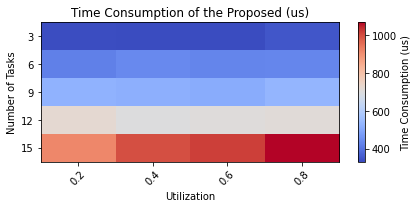

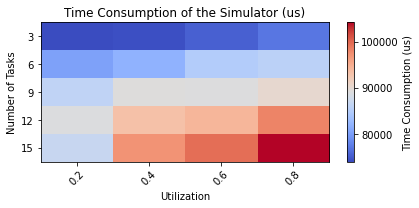

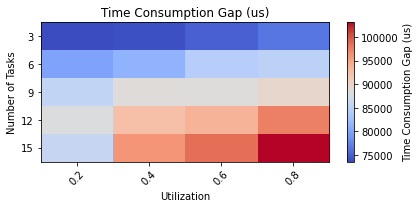

In [12]:
plot_heatmap(pivot_proposed, "Time Consumption of the Proposed (us)", "Time Consumption (us)")
plot_heatmap(pivot_simulator, "Time Consumption of the Simulator (us)", "Time Consumption (us)")
plot_heatmap(pivot_gap, "Time Consumption Gap (us)", "Time Consumption Gap (us)")

In [13]:
# Create a 3D plot to show the relationship between 'numTasks', 'utilization', and 'timeConsumptionGap'
def creat3Dplot(z, z_label, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = grouped_data['numTasks']
    y = grouped_data['utilization']

    scatter = ax.scatter(x, y, z, c=z, cmap=coolwarm, marker='o')
    ax.set_xlabel('Number of Tasks')
    ax.set_ylabel('Utilization')
    ax.set_zlabel(z_label)
    ax.set_title(title)

    # Add a colorbar
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label(z_label)

    plt.show()

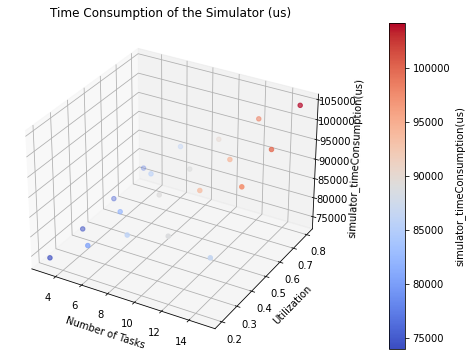

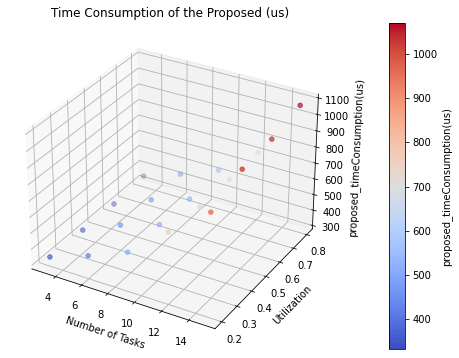

In [14]:
creat3Dplot(grouped_data_filtered['simulator_timeConsumption(us)'], 'simulator_timeConsumption(us)', 'Time Consumption of the Simulator (us)')
creat3Dplot(grouped_data_filtered['proposed_timeConsumption(us)'], 'proposed_timeConsumption(us)', 'Time Consumption of the Proposed (us)')
# creat3Dplot(grouped_data_filtered['simulator_timeConsumption(us)'] - grouped_data['proposed_timeConsumption(us)'], 'timeConsumption Gap(us)', 'Time Consumption Gap (us)')

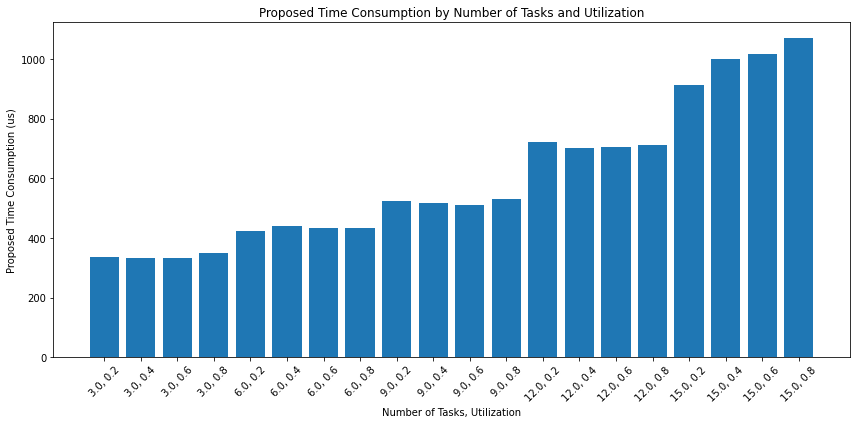

In [15]:
# Create a bar chart to show the relationship between 'numTasks' and 'utilization' and 'proposed_timeConsumption'
plt.figure(figsize=(12, 6))
x = range(len(grouped_data_filtered))
y = grouped_data_filtered['proposed_timeConsumption(us)']

# Create labels for the x-axis by combining 'numTasks' and 'utilization'
x_labels = [f'{num_tasks}, {utilization}' for num_tasks, utilization in grouped_data_filtered[['numTasks', 'utilization']].values]

plt.bar(x, y)
plt.xlabel('Number of Tasks, Utilization')
plt.ylabel('Proposed Time Consumption (us)')
plt.title('Proposed Time Consumption by Number of Tasks and Utilization')
plt.xticks(x, x_labels, rotation=45)
plt.tight_layout()
plt.show()

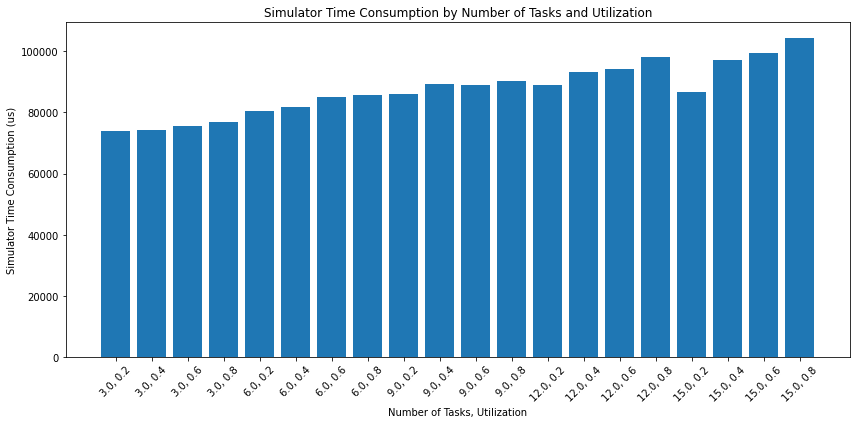

In [16]:
# Create a bar chart to show the relationship between 'numTasks' and 'utilization' and 'proposed_timeConsumption'
plt.figure(figsize=(12, 6))
x = range(len(grouped_data_filtered))
y = grouped_data_filtered['simulator_timeConsumption(us)']

# Create labels for the x-axis by combining 'numTasks' and 'utilization'
x_labels = [f'{num_tasks}, {utilization}' for num_tasks, utilization in grouped_data_filtered[['numTasks', 'utilization']].values]

plt.bar(x, y)
plt.xlabel('Number of Tasks, Utilization')
plt.ylabel('Simulator Time Consumption (us)')
plt.title('Simulator Time Consumption by Number of Tasks and Utilization')
plt.xticks(x, x_labels, rotation=45)
plt.tight_layout()
plt.show()